# 📊 Análise Exploratória de Dados: PhoneDex

Este notebook realiza uma análise exploratória dos dados de smartphones disponíveis no dataset original usado pelo projeto PhoneDex. A análise tem como objetivo identificar padrões de evolução dos dispositivos ao longo do tempo, com foco em variáveis como **preço**, **capacidade de bateria**, **marca**, **ano de lançamento** e **sistema operacional**. A seguir está o detalhamento de cada etapa:

### **Carregamento e limpeza dos dados**

Os dados são lidos de um arquivo `.xlsx`, com limpeza de colunas textuais e criação de colunas numéricas derivadas, como `Preço (R$)` e `Bateria (mAh)`.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Display settings
plt.rcParams.update({"axes.labelsize": 11, "axes.titlesize": 13, "figure.autolayout": True})
sns.set_style("whitegrid")

# Set this to your Excel file path
EXCEL_FILE = "D:/Projetos/faculdade/PISI3GP6/datasets/pisi3basededados.xlsx"


In [2]:

cotacao_dolar = 5.68  # adjust if needed

df = pd.read_excel(EXCEL_FILE)
df.columns = df.columns.str.strip()

# Basic cleaning and new columns
df["Preço (USD)"] = (
    df["Launched Price (USA)"]
    .astype(str)
    .str.replace("USD", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)

df["Preço (R$)"] = df["Preço (USD)"] * cotacao_dolar
df["Ano"] = df["Launched Year"]
df["Marca"] = df["Company Name"]
df["Sistema Operacional"] = df["Sistema Operacional"].astype(str).str.strip()
df["Sistema Operacional (Binário)"] = np.where(df["Sistema Operacional"].str.lower().str.contains("android"), 0, 1)
df["Peso (g)"] = df["Mobile Weight"].astype(str).str.replace("g", "", regex=False).astype(float)
df["Memoria Interna (GB)"] = (
    df["RAM"]
    .astype(str)
    .str.replace("GB", "", regex=False)
    .str.replace(r"/.*", "", regex=True)  # Remove tudo após "/"
    .str.strip()
    .astype(float)
)
df["Câmera Frontal (MP)"] = (
    df["Front Camera"]
    .astype(str)
    .str.replace("MP", "", regex=False)
    .str.replace("Dual ", "", regex=False)  # Remove tudo após "/"
    .str.replace(r"/.*", "", regex=True)  # Remove tudo após "/"
    .str.replace(r"\+.*", "", regex=True)  # Remove tudo após "+"
    .str.replace(r",.*", "", regex=True)  # Remove tudo após ","
    .str.replace(r"\(.*?\)", "", regex=True)  # Remove tudo entre "()"
    .str.strip()
    .astype(float)
)
df["Câmera Traseira (MP)"] = (
    df["Back Camera"]
    .astype(str)
    .str.replace("MP", "", regex=False)
    .str.replace("Dual ", "", regex=False)  # Remove tudo após "/"
    .str.replace(r"/.*", "", regex=True)  # Remove tudo após "/"
    .str.replace(r"\+.*", "", regex=True)  # Remove tudo após "+"
    .str.replace(r",.*", "", regex=True)  # Remove tudo após ","
    .str.replace(r"\(.*?\)", "", regex=True)  # Remove tudo entre "()"
    .str.strip()
    .astype(float)
)
df["Tela (polegadas)"] = (
    df["Screen Size"]
    .astype(str)
    .str.replace(" inches", "", regex=False)
    .str.replace(r",.*", "", regex=True)  # Remove tudo após ","
    .str.replace(r"\(.*?\)", "", regex=True)  # Remove tudo entre "()"
    .astype(float)
)
df["Bateria (mAh)"] = (
    df["Battery Capacity"]
    .astype(str)
    .str.replace("mAh", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)

# Remove unnecessary columns
df.drop(
    columns=[
        "Mobile Weight",
        "Launched Price (USA)",
        "Battery Capacity",
        "RAM",
        "Front Camera",
        "Back Camera",
        "Screen Size",
        "Launched Year",
        "Company Name",
    ],
    inplace=True
)

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (373, 14)


,Model Name,Processor,Sistema Operacional,Preço (USD),Preço (R$),Ano,Marca,Sistema Operacional (Binário),Peso (g),Memoria Interna (GB),Câmera Frontal (MP),Câmera Traseira (MP),Tela (polegadas),Bateria (mAh)
0,iPhone 16 128GB,A17 Bionic,iOS,799.0,4538.32,2024,Apple,1,174.0,6.0,12.0,48.0,6.1,3600.0
1,iPhone 16 256GB,A17 Bionic,iOS,849.0,4822.32,2024,Apple,1,174.0,6.0,12.0,48.0,6.1,3600.0
2,iPhone 16 512GB,A17 Bionic,iOS,899.0,5106.32,2024,Apple,1,174.0,6.0,12.0,48.0,6.1,3600.0
3,iPhone 16 Plus 128GB,A17 Bionic,iOS,899.0,5106.32,2024,Apple,1,203.0,6.0,12.0,48.0,6.7,4200.0
4,iPhone 16 Plus 256GB,A17 Bionic,iOS,949.0,5390.32,2024,Apple,1,203.0,6.0,12.0,48.0,6.7,4200.0


### **Estatísticas descritivas das variáveis numéricas**

In [5]:
# Informações básicas do dataset
print(f"\n=== INFORMAÇÕES BÁSICAS DO DATASET ===")
print(f"Período analisado: {df['Ano'].min()} - {df['Ano'].max()}")
print(f"Número de marcas: {df['Marca'].nunique()}")
print(f"Faixa de preço: R${df['Preço (R$)'].min():.2f} - R${df['Preço (R$)'].max():.2f}")
print(f"Capacidade de bateria: {df['Bateria (mAh)'].min():.0f} - {df['Bateria (mAh)'].max():.0f} mAh")

# Verificação de valores ausentes
print(f"\n=== VALORES AUSENTES ===")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "Nenhum valor ausente encontrado")

# Estatísticas descritivas das variáveis numéricas
print(f"\n=== ESTATÍSTICAS DESCRITIVAS ===")
numeric_cols = ["Preço (R$)", "Bateria (mAh)", "Peso (g)", "Memoria Interna (GB)", "Câmera Frontal (MP)", "Câmera Traseira (MP)", "Tela (polegadas)"]
print(df[numeric_cols].describe())


=== INFORMAÇÕES BÁSICAS DO DATASET ===
Período analisado: 2016 - 2024
Número de marcas: 8
Faixa de preço: R$732.72 - R$15898.32
Capacidade de bateria: 2227 - 6500 mAh

=== VALORES AUSENTES ===
Nenhum valor ausente encontrado

=== ESTATÍSTICAS DESCRITIVAS ===
         Preço (R$)  Bateria (mAh)    Peso (g)  Memoria Interna (GB)  \
count    373.000000     373.000000  373.000000            373.000000   
mean    3872.353857    4543.018767  194.684718              7.557641   
std     2751.460455     811.740611   21.014591              3.076101   
min      732.720000    2227.000000  135.000000              2.000000   
25%     1698.320000    4200.000000  184.000000              6.000000   
50%     2840.000000    4815.000000  193.000000              8.000000   
75%     5674.320000    5000.000000  205.000000              8.000000   
max    15898.320000    6500.000000  295.000000             16.000000   

       Câmera Frontal (MP)  Câmera Traseira (MP)  Tela (polegadas)  
count           373.00

### **Correlação entre atributos numéricos**

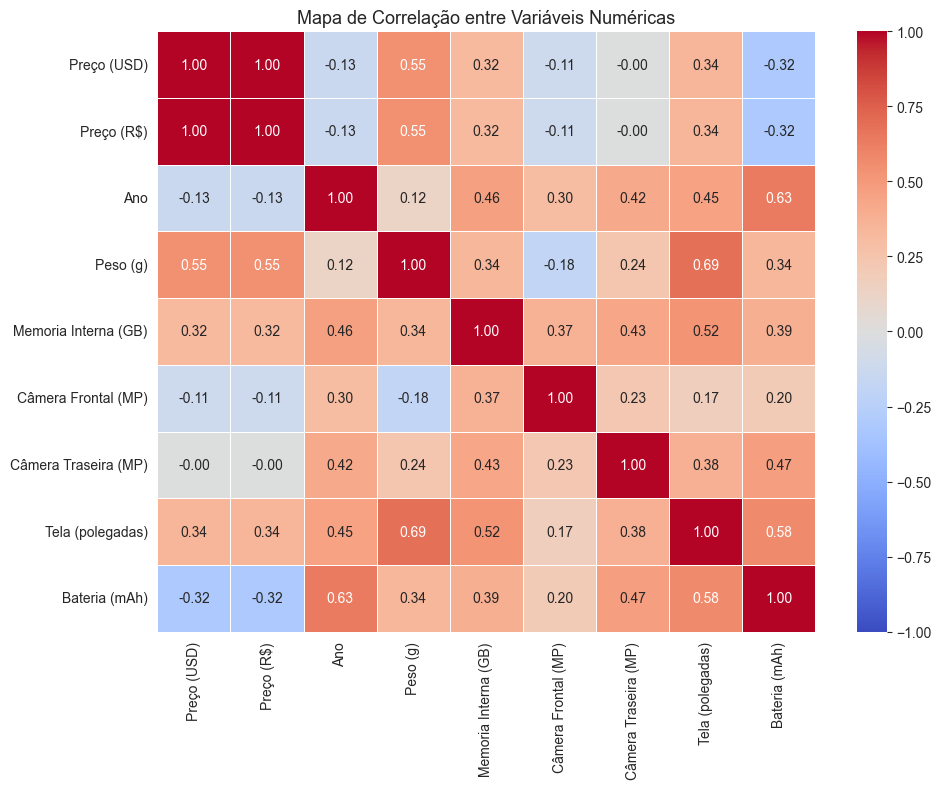

In [6]:
# Selecionar apenas colunas numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Calcular a matriz de correlação
corr = numeric_cols.corr()

# Plotar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=0.5, 
    vmin=-1, vmax=1  # Escala explícita de -1 a 1
)
plt.title('Mapa de Correlação entre Variáveis Numéricas')
plt.show()

### **Evolução dos preços médios por marca ao longo dos anos**

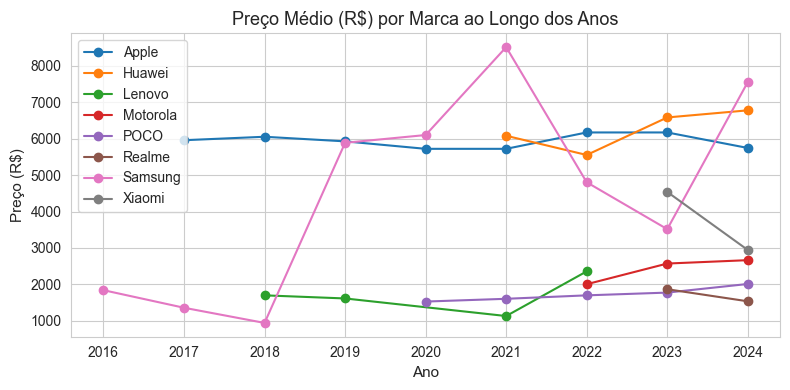

In [8]:

available_brands = sorted(df['Marca'].dropna().unique())

dados_preco = (
    df[df["Marca"].isin(available_brands)]
    .groupby(["Marca", "Ano"])["Preço (R$)"]
    .mean()
    .reset_index()
)

fig, ax = plt.subplots(figsize=(8, 4))
for m in available_brands:
    linha = dados_preco[dados_preco["Marca"] == m]
    ax.plot(linha["Ano"], linha["Preço (R$)"], marker="o", label=m)

ax.set_title("Preço Médio (R$) por Marca ao Longo dos Anos")
ax.set_xlabel("Ano")
ax.set_ylabel("Preço (R$)")
ax.legend()
plt.show()


### **Evolução da capacidade média de bateria por marca**

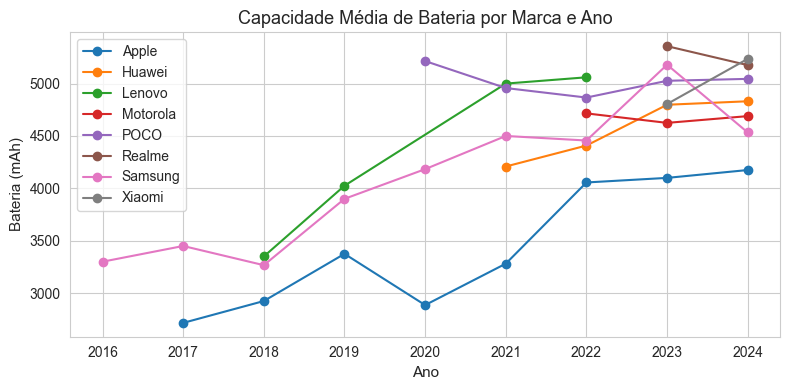

In [9]:

dados_bat = (
    df[df["Marca"].isin(available_brands)]
    .groupby(["Marca", "Ano"])["Bateria (mAh)"]
    .mean()
    .reset_index()
)

fig, ax = plt.subplots(figsize=(8, 4))
for m in available_brands:
    linha = dados_bat[dados_bat["Marca"] == m]
    ax.plot(linha["Ano"], linha["Bateria (mAh)"], marker="o", label=m)

ax.set_title("Capacidade Média de Bateria por Marca e Ano")
ax.set_xlabel("Ano")
ax.set_ylabel("Bateria (mAh)")
ax.legend()
plt.show()


### **Preço médio por sistema operacional**

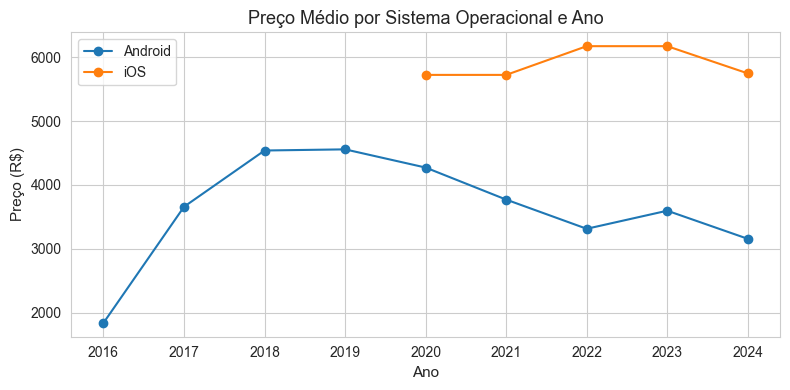

In [10]:

so_grp = df.groupby(["Sistema Operacional", "Ano"])["Preço (R$)"].mean().reset_index()

fig, ax = plt.subplots(figsize=(8, 4))
for so in so_grp["Sistema Operacional"].unique():
    linha = so_grp[so_grp["Sistema Operacional"] == so]
    ax.plot(linha["Ano"], linha["Preço (R$)"], marker="o", label=so)

ax.set_title("Preço Médio por Sistema Operacional e Ano")
ax.set_xlabel("Ano")
ax.set_ylabel("Preço (R$)")
ax.legend()
plt.show()


### **Variação percentual de preços por marca (primeiro vs último ano disponível)**

In [11]:

variacoes = []
for marca in df["Marca"].unique():
    serie = df[df["Marca"] == marca].groupby("Ano")["Preço (R$)"].mean().sort_index()
    if len(serie) > 1:
        perc = (serie.iloc[-1] - serie.iloc[0]) / serie.iloc[0] * 100
        variacoes.append({
            "Marca": marca,
            "Ano Inicial": serie.index[0],
            "Ano Final": serie.index[-1],
            "Preço Inicial (R$)": round(serie.iloc[0], 2),
            "Preço Final (R$)": round(serie.iloc[-1], 2),
            "Variação (%)": round(perc, 2),
            "Tendência": "↑ Aumento" if perc > 0 else "↓ Queda",
        })

pd.DataFrame(variacoes).sort_values("Variação (%)", ascending=False).reset_index(drop=True)


,Marca,Ano Inicial,Ano Final,Preço Inicial (R$),Preço Final (R$),Variação (%),Tendência
0,Samsung,2016,2024,1840.32,7555.03,310.53,↑ Aumento
1,Lenovo,2018,2022,1698.32,2357.20,38.80,↑ Aumento
2,Motorola,2022,2024,2004.41,2664.55,32.93,↑ Aumento
3,POCO,2020,2024,1527.92,2010.72,31.60,↑ Aumento
4,Huawei,2021,2024,6080.03,6778.37,11.49,↑ Aumento
5,Apple,2017,2024,5958.32,5745.32,-3.57,↓ Queda
6,Realme,2023,2024,1866.29,1534.95,-17.75,↓ Queda
7,Xiaomi,2023,2024,4538.32,2943.88,-35.13,↓ Queda


### **Distribuição de sistemas operacionais**

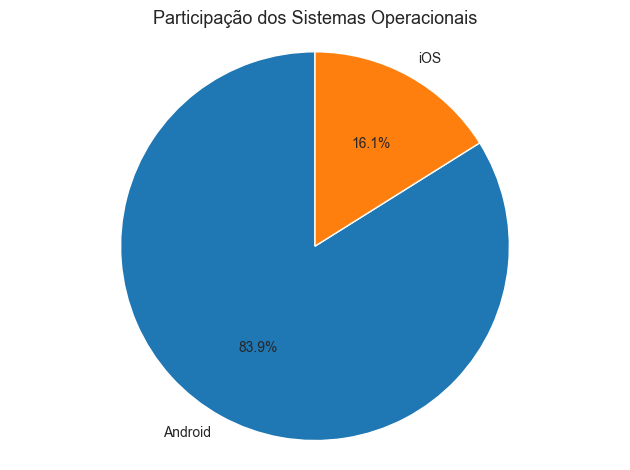

In [12]:

so_counts = df["Sistema Operacional"].value_counts()
fig, ax = plt.subplots()
ax.pie(so_counts.values, labels=so_counts.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Participação dos Sistemas Operacionais')
plt.show()


### **Distribuição de preços por sistema operacional**

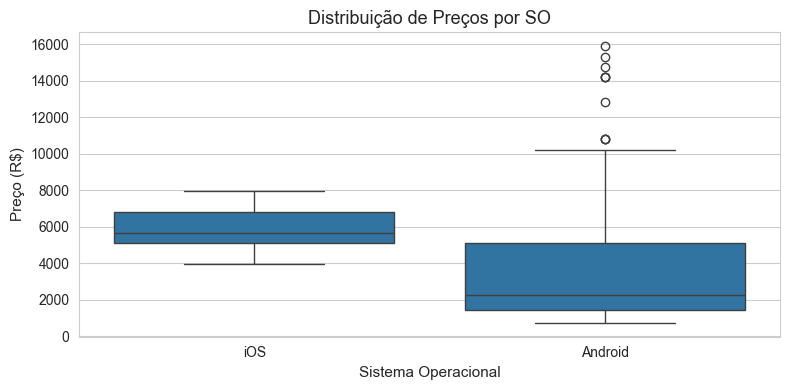

In [13]:

fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(data=df, x="Sistema Operacional", y="Preço (R$)", ax=ax)
ax.set_title("Distribuição de Preços por SO")
plt.show()


### **Lançamentos de smartphones por ano**

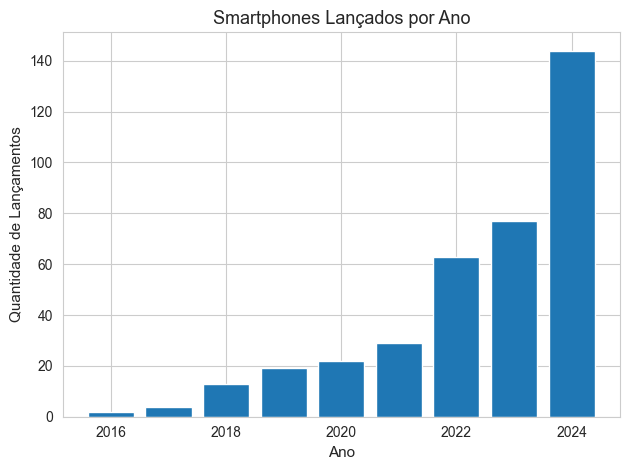

In [14]:

lanc_ano = df["Ano"].value_counts().sort_index()
fig, ax = plt.subplots()
ax.bar(lanc_ano.index, lanc_ano.values)
ax.set_xlabel("Ano")
ax.set_ylabel("Quantidade de Lançamentos")
ax.set_title("Smartphones Lançados por Ano")
plt.show()


### **Heatmap de lançamentos por marca e ano**

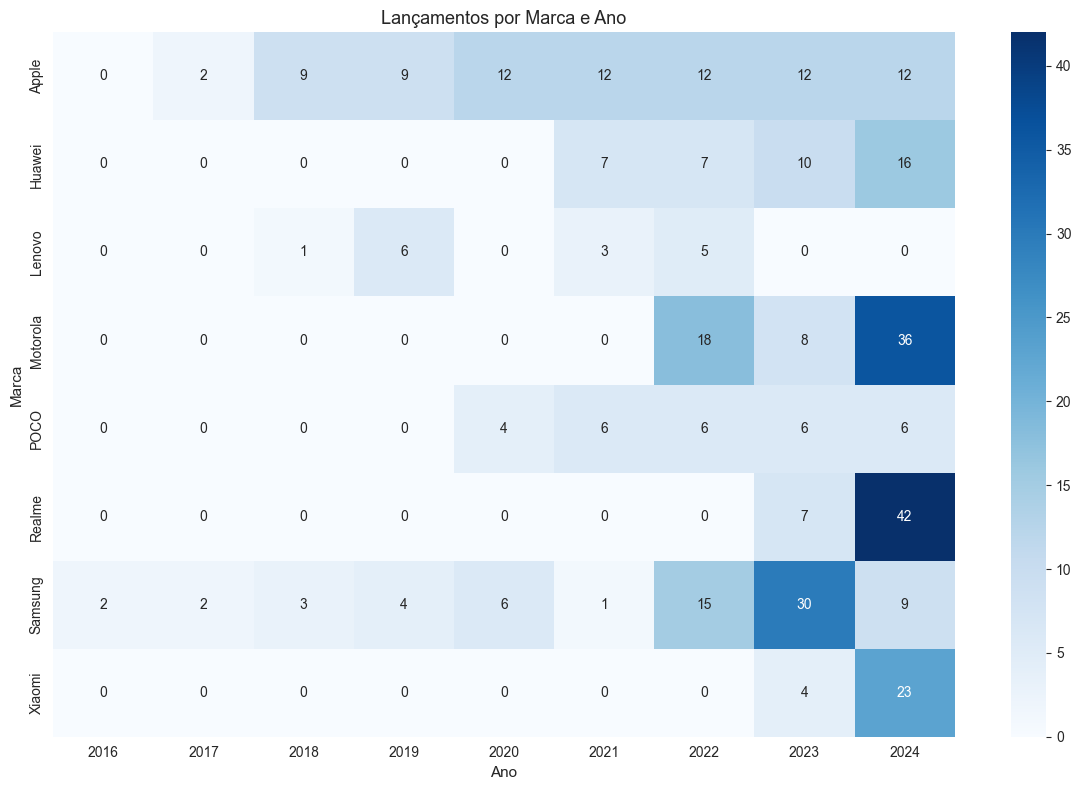

In [15]:

pivot = df.pivot_table(index="Marca", columns="Ano", values="Model Name", aggfunc="count", fill_value=0)
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt="d", cmap="Blues", ax=ax)
ax.set_title("Lançamentos por Marca e Ano")
plt.show()


### **Distribuição de Bateria por Marca**

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_38488\1537942922.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


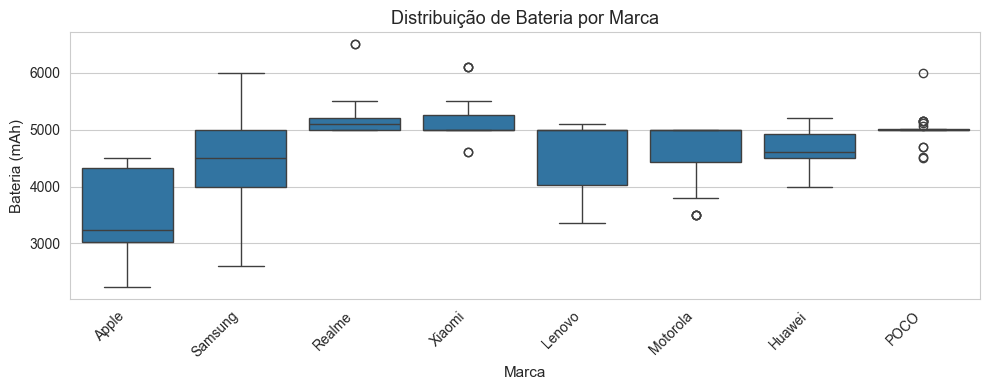

In [16]:

fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df, x="Marca", y="Bateria (mAh)", ax=ax)
ax.set_title("Distribuição de Bateria por Marca")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()


### **Analise de segmentação com KMeans (Clusterização)**


=== Variáveis utilizadas para clusterização: ===
- Preço (R$)
- Bateria (mAh)
- Peso (g)
- Memoria Interna (GB)
- Câmera Frontal (MP)
- Câmera Traseira (MP)
- Tela (polegadas)

=== DETERMINAÇÃO DO NÚMERO ÓTIMO DE CLUSTERS ===


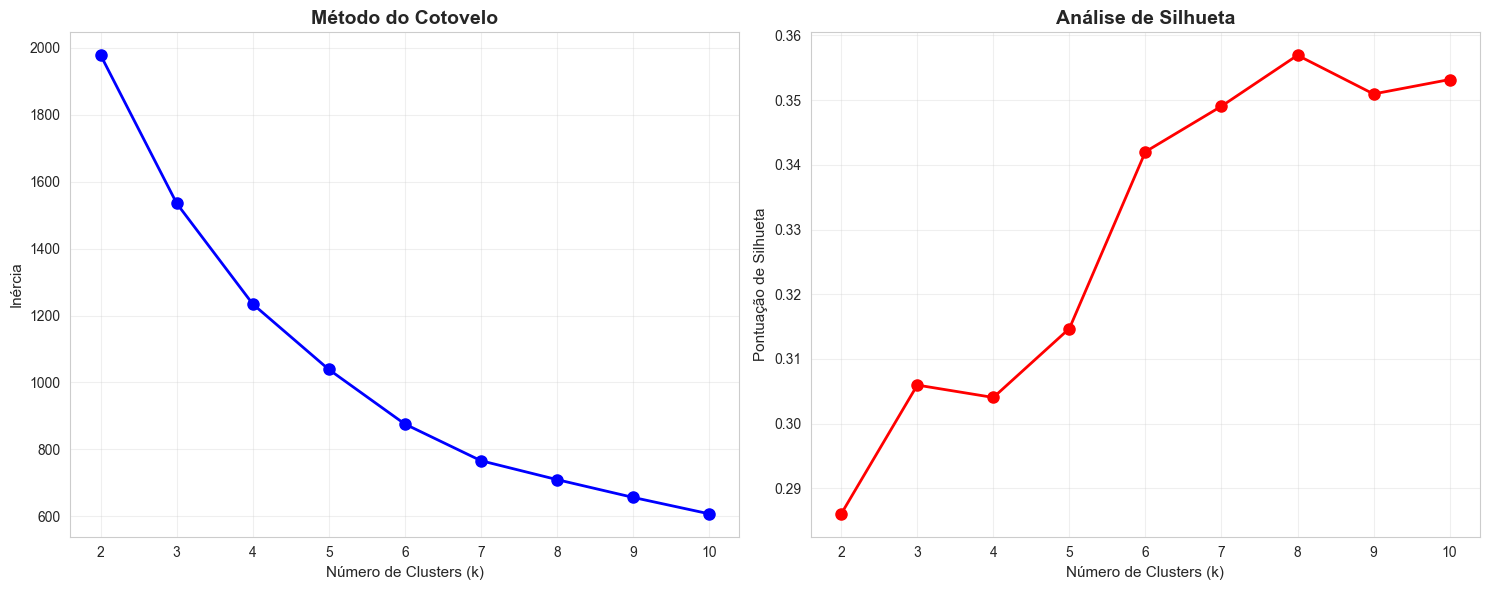

Número ótimo de clusters baseado na silhueta: 8
Pontuação de silhueta: 0.357

=== CARACTERIZAÇÃO DOS CLUSTERS ===
           Preço (R$)  Bateria (mAh)    Peso (g)  Memoria Interna (GB)  \
cluster                                                                  
0         3563.751579    5118.947368  200.684211              8.736842   
1         6134.129524    4237.634921  207.523810              7.015873   
2         4281.832500    3202.812500  173.468750              4.890625   
3         1498.482783    5085.000000  192.954783              5.878261   
4         4062.330174    5285.897436  204.758974             12.923077   
5        12028.346667    4566.666667  248.533333             11.466667   
6         3117.740408    4501.632653  179.387755              8.938776   
7         5804.265778    5036.666667  215.000000             12.000000   

         Câmera Frontal (MP)  Câmera Traseira (MP)  Tela (polegadas)  \
cluster                                                                
0

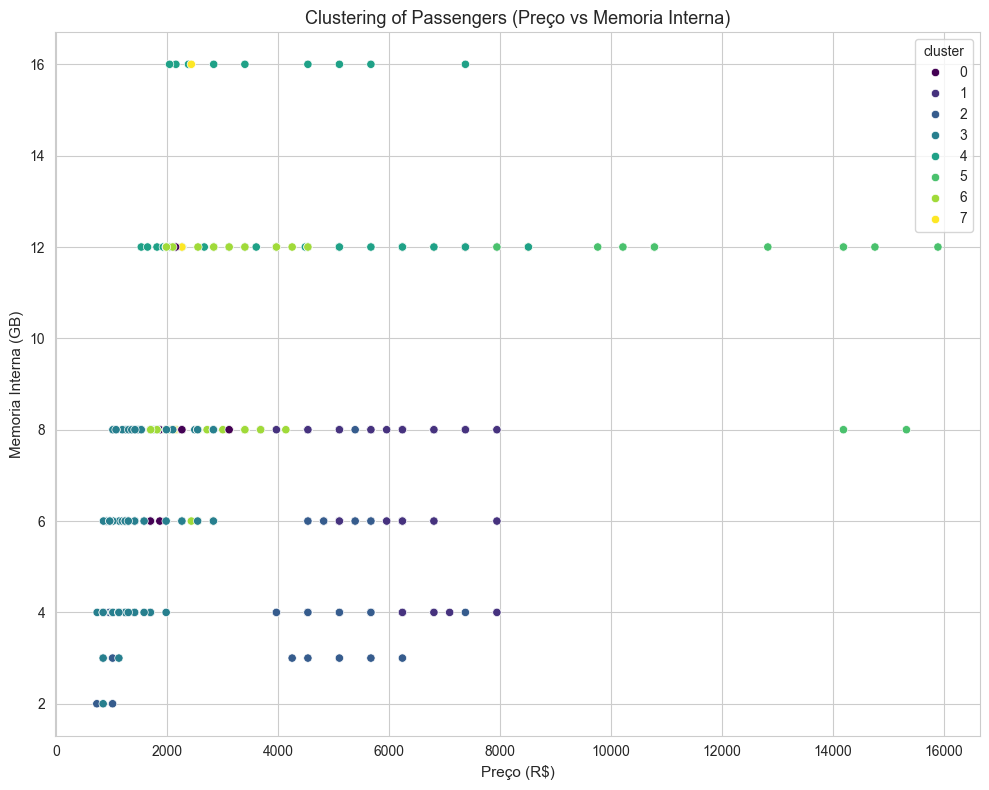

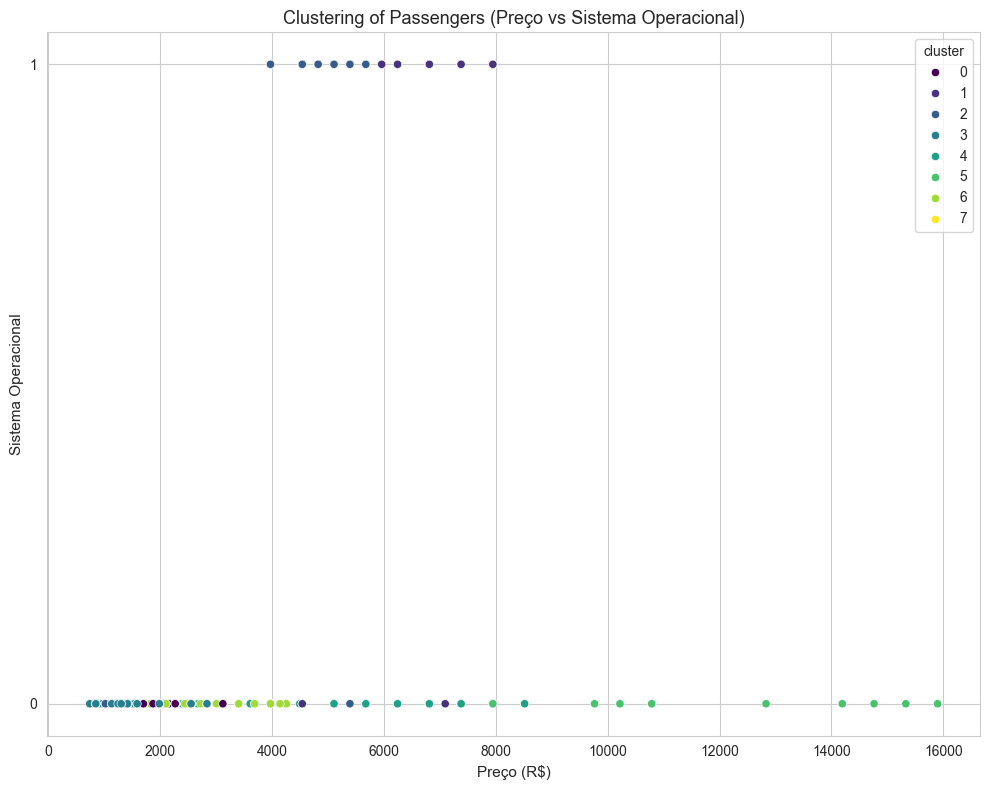

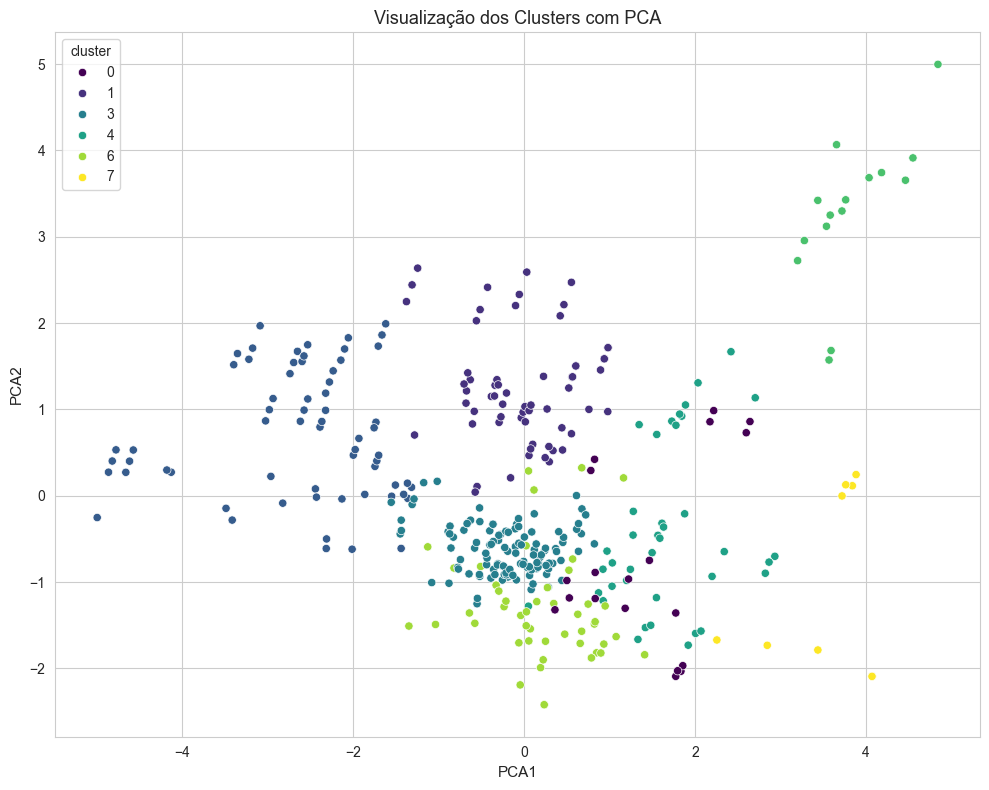

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Seleciona apenas colunas numéricas para clusterizar
features_for_clustering = [
    "Preço (R$)", 
    "Bateria (mAh)", 
    "Peso (g)", 
    "Memoria Interna (GB)", 
    "Câmera Frontal (MP)", 
    "Câmera Traseira (MP)", 
    "Tela (polegadas)"
]

df_clustering = df[features_for_clustering].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clustering)

print("\n=== Variáveis utilizadas para clusterização: ===")
for feature in df_clustering:
    print(f"- {feature}")

# Método do cotovelo para determinar número ótimo de clusters
print("\n=== DETERMINAÇÃO DO NÚMERO ÓTIMO DE CLUSTERS ===")

inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Visualização dos métodos de avaliação
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Método do cotovelo
ax1.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_title('Método do Cotovelo', fontsize=14, fontweight='bold')
ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Inércia')
ax1.grid(True, alpha=0.3)

# Pontuação de silhueta
ax2.plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_title('Análise de Silhueta', fontsize=14, fontweight='bold')
ax2.set_xlabel('Número de Clusters (k)')
ax2.set_ylabel('Pontuação de Silhueta')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Determinação do número ótimo de clusters
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"Número ótimo de clusters baseado na silhueta: {optimal_k}")
print(f"Pontuação de silhueta: {max(silhouette_scores):.3f}")

# Aplicação do K-Means com número ótimo de clusters
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans_final.fit_predict(X_scaled)

print(f"\n=== CARACTERIZAÇÃO DOS CLUSTERS ===")
print(df.groupby('cluster')[features_for_clustering].mean())

# Visualização dos clusters em relação ao preço e memória interna
plt.figure(figsize=(10, 8))
sns.scatterplot(x="Preço (R$)", y="Memoria Interna (GB)", hue='cluster', data=df, palette='viridis', legend='full')
plt.title('Clustering of Passengers (Preço vs Memoria Interna)')
plt.xlabel('Preço (R$)')
plt.ylabel('Memoria Interna (GB)')
plt.show()

# PCA para visualização dos clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df, palette='viridis')
plt.title('Visualização dos Clusters com PCA')
plt.show()


### **Top 5 smartphones mais caros e mais baratos**

In [47]:
top_preco = df.sort_values("Preço (R$)", ascending=False).head(5)
top_preco["Categoria"] = "Mais Caros"

lower_preco = df.sort_values("Preço (R$)", ascending=True).head(5)
lower_preco["Categoria"] = "Mais Baratos"

result = pd.concat([top_preco, lower_preco]).reset_index(drop=True)
result[["Marca", "Model Name", "Ano", "Preço (R$)", "Categoria"]]

,Marca,Model Name,Ano,Preço (R$),Categoria
0,Huawei,Mate XT 512GB,2024,15898.32,Mais Caros
1,Huawei,Mate X2,2021,15330.32,Mais Caros
2,Huawei,Mate XT 256GB,2024,14762.32,Mais Caros
3,Huawei,Mate X6,2024,14194.32,Mais Caros
4,Huawei,Mate X3,2023,14194.32,Mais Caros
5,Samsung,Galaxy J4 16GB,2018,732.72,Mais Baratos
6,Realme,C61 128GB,2024,738.40,Mais Baratos
7,POCO,C65 64GB,2024,846.32,Mais Baratos
8,Motorola,Moto G Play 32GB,2022,846.32,Mais Baratos
9,Lenovo,A6 Note 32GB,2019,846.32,Mais Baratos


### **Top 5 smartphones com maior e menor capacidade de bateria**

In [48]:

top_bat = df.sort_values("Bateria (mAh)", ascending=False).head(5)
top_bat["Categoria"] = "Mais Potentes"

lower_bat = df.sort_values("Bateria (mAh)", ascending=True).head(5)
lower_bat["Categoria"] = "Menos Potentes"

result_bat = pd.concat([top_bat, lower_bat]).reset_index(drop=True)
result_bat[["Marca", "Model Name", "Ano", "Bateria (mAh)", "Categoria"]]


,Marca,Model Name,Ano,Bateria (mAh),Categoria
0,Realme,GT 7 Pro 256GB,2024,6500.0,Mais Potentes
1,Realme,GT 7 Pro 128GB,2024,6500.0,Mais Potentes
2,Xiaomi,Xiaomi 15 Pro 512GB,2024,6100.0,Mais Potentes
3,Xiaomi,Xiaomi 15 Pro 1TB,2024,6100.0,Mais Potentes
4,Xiaomi,Xiaomi 15 Pro 256GB,2024,6100.0,Mais Potentes
5,Apple,iPhone 12 mini 128GB,2020,2227.0,Menos Potentes
6,Apple,iPhone 12 mini 256GB,2020,2227.0,Menos Potentes
7,Apple,iPhone 12 mini 64GB,2020,2227.0,Menos Potentes
8,Apple,iPhone 13 mini 512GB,2021,2438.0,Menos Potentes
9,Apple,iPhone 13 mini 256GB,2021,2438.0,Menos Potentes
